In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [21]:
#Questão 1

In [22]:
df = pd.read_csv('data/vertebralcolumn-2C.csv')
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [23]:
x = df.drop('class', axis=1)
y = df['class']
x,y

(     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
 0           63.027817    22.552586              39.609117     40.475232   
 1           39.056951    10.060991              25.015378     28.995960   
 2           68.832021    22.218482              50.092194     46.613539   
 3           69.297008    24.652878              44.311238     44.644130   
 4           49.712859     9.652075              28.317406     40.060784   
 ..                ...          ...                    ...           ...   
 305         47.903565    13.616688              36.000000     34.286877   
 306         53.936748    20.721496              29.220534     33.215251   
 307         61.446597    22.694968              46.170347     38.751628   
 308         45.252792     8.693157              41.583126     36.559635   
 309         33.841641     5.073991              36.641233     28.767649   
 
      pelvic_radius  degree_spondylolisthesis  
 0        98.672917                 -0

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train, x_test, y_train, y_test

(     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
 299         82.905351    29.894119              58.250542     53.011232   
 288         74.565015    15.724320              58.618582     58.840695   
 72          84.974132    33.021175              60.859873     51.952957   
 15          44.318907    12.537992              36.098763     31.780915   
 10          49.706610    13.040974              31.334500     36.665635   
 ..                ...          ...                    ...           ...   
 188         85.680950    38.650035              82.680977     47.030914   
 71          86.900794    32.928168              47.794347     53.972627   
 106         65.013773     9.838262              57.735837     55.175511   
 270         51.311771     8.875541              57.000000     42.436230   
 102         70.399308    13.469986              61.200000     56.929322   
 
      pelvic_radius  degree_spondylolisthesis  
 299     110.708958                  6

In [25]:
from sklearn.naive_bayes import GaussianNB

# Cria uma instância do classificador Gaussian Naive Bayes
gnb = GaussianNB()

# Treina o modelo usando os dados de treinamento (.fit)
gnb.fit(x_train,y_train)

# Usa o modelo treinado para fazer predições nos dados de teste (.predict)
y_pred = gnb.predict(x_test)

# Calcula a acurácia comparando as predições com os valores reais
accNB = accuracy_score(y_test, y_pred)

In [26]:
from scipy.stats import multivariate_normal

# Pega os nomes das classes únicas
classes = np.unique(y)
# Cria um DataFrame para armazenar as probabilidades a posteriori para cada amostra de teste
P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes)
# Cria um vetor para armazenar a probabilidade a priori de cada classe
Pc = np.zeros(len(classes))

# Itera sobre cada uma das classes para aprender seus parâmetros
for i in range(0, len(classes)):

    # Encontra os índices (posições) das amostras de treino que pertencem à classe atual
    elementos = np.where(y_train == classes[i])[0]
    
    # Calcula a Probabilidade a Priori P(C): a frequência da classe no treino
    Pc[i] = len(elementos)/len(y_train)
    
    # Seleciona os dados de treino da classe atual usando .iloc para indexação posicional
    Z = x_train.iloc[elementos,:].astype(float)
    
    # Estima os parâmetros da distribuição Gaussiana para esta classe:
    # m = vetor de médias (o "centro" da distribuição)
    m = np.mean(Z, axis = 0)
    # cv = matriz de covariância (a "forma" e "dispersão" da distribuição)
    cv = np.cov(np.transpose(Z))
    
    # Itera sobre cada amostra do conjunto de teste
    for j in range(0, x_test.shape[0]):

        # Pega a amostra de teste atual
        aux = x_test.iloc[j,:].to_numpy()
        aux = aux.reshape((1,len(aux)))
        
        # Calcula a Verossimilhança P(X|C)
        # Ou seja, a probabilidade de ver a amostra 'aux' dado que ela pertence à distribuição desta classe
        pj = multivariate_normal.pdf(aux, mean=m, cov=cv, allow_singular=True)
        
        # Aplica o Teorema de Bayes: P(C|X) ∝ P(X|C) * P(C)
        # Armazena a probabilidade a posteriori (não normalizada)
        P.loc[j, classes[i]] = pj*Pc[i]

# Faz a predição final
y_pred = []
# Itera sobre a matriz de probabilidades P
for k in range (0, P.shape[0]):

    # Para cada amostra, encontra o índice da classe com a MAIOR probabilidade a posteriori (Regra MAP)
    c = np.argmax(np.array(P.iloc[[k]]))
    # Adiciona o nome da classe predita à lista
    y_pred.append(classes[c])

y_pred = np.array(y_pred)

# Calcula a acurácia final para o modelo paramétrico manual
accBP = accuracy_score(y_pred, y_test)

accBP

0.8064516129032258

In [27]:
from sklearn.neighbors import KernelDensity

# Lista para armazenar as acurácias de cada teste com 'h' diferente
list_of_accs = []
# Lista de valores do hiperparâmetro 'h' (largura de banda) para testar
list_of_hs = [h/100 for h in range(1, 201)] # Testa h de 0.01 a 2.00
# Pega as classes únicas do conjunto de treino
classes = np.unique(y_train)

# Itera sobre cada valor de 'h' para encontrar o melhor
for h in list_of_hs:
    
    # Cria a matriz de probabilidades para o 'h' atual
    P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns=classes)

    for i in classes:

        # Encontra as amostras da classe atual
        elements = (y_train == i)
        # Calcula a Probabilidade a Priori
        prior = np.sum(elements) / len(y_train)
        # 
        Z = x_train.loc[elements, :]
        
        # Se a classe tem amostras no conjunto de treino
        if Z.shape[0] > 0:

            # Treina o modelo de Kernel Density Estimation (KDE) com os dados da classe e o 'h' atual
            kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
            
            # Calcula a Verossimilhança P(X|C) para todas as amostras de teste
            # kde.score_samples retorna o log da probabilidade, por isso usamos np.exp()
            likelihood = np.exp(kde.score_samples(x_test))
            
            # Aplica Bayes: Posteriori ∝ Likelihood * Priori
            P[i] = likelihood * prior
        else:
            P[i] = 0
            
    # Faz a predição escolhendo a classe com a maior probabilidade para cada amostra de teste
    y_pred_kde = P.idxmax(axis=1).to_numpy()
    # Calcula a acurácia para o 'h' testado
    score = accuracy_score(y_test, y_pred_kde)
    # Adiciona a acurácia na lista
    list_of_accs.append(score)
        
# A acurácia final do modelo não-paramétrico é a maior acurácia encontrada entre todos os 'h' testados
accBNP = max(list_of_accs)

accBNP

0.8494623655913979

In [28]:
accs = {"Naive Bayes":accNB,"Bayesino paramétrico":accBP,"Bayesino não-paramétrico":accBNP}
best_classifier = max(accs, key=accs.get)

In [29]:
print(f"Resposta da questão 1: O melhor classificador foi {best_classifier}")

Resposta da questão 1: O melhor classificador foi Bayesino não-paramétrico


#Questão 2

In [30]:
df = pd.read_csv('data/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [31]:
dfx = df.drop('quality', axis=1)
dfy = df['quality']
x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.3, random_state=42)
x_train, x_test, y_train, y_test

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 925             8.6             0.220         0.36             1.9      0.064   
 363            12.5             0.460         0.63             2.0      0.071   
 906             7.2             0.540         0.27             2.6      0.084   
 426             6.4             0.670         0.08             2.1      0.045   
 1251            7.5             0.580         0.14             2.2      0.077   
 ...             ...               ...          ...             ...        ...   
 1130            9.1             0.600         0.00             1.9      0.058   
 1294            8.2             0.635         0.10             2.1      0.073   
 860             7.2             0.620         0.06             2.7      0.077   
 1459            7.9             0.200         0.35             1.7      0.054   
 1126            5.8             0.290         0.26             1.7      0.063   
 
       free su

In [32]:
from sklearn.neighbors import KernelDensity

# Lista para armazenar as acurácias de cada teste com 'h' diferente
list_of_accs = []
# Lista de valores do hiperparâmetro 'h' (largura de banda) para testar
list_of_hs = [h/100 for h in range(1, 201)] # Testa h de 0.01 a 2.00
# Pega as classes únicas do conjunto de treino
classes = np.unique(y_train)

# Itera sobre cada valor de 'h' para encontrar o melhor
for h in list_of_hs:
    
    # Cria a matriz de probabilidades para o 'h' atual
    P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns=classes)

    for i in classes:

        # Encontra as amostras da classe atual
        elements = (y_train == i)
        # Calcula a Probabilidade a Priori
        prior = np.sum(elements) / len(y_train)       
        # Seleciona os dados de treino da classe atual
        Z = x_train.loc[elements, :]
        
        # Se a classe tem amostras no conjunto de treino
        if Z.shape[0] > 0:

            # Treina o modelo de Kernel Density Estimation (KDE) com os dados da classe e o 'h' atual
            kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
            
            # Calcula a Verossimilhança P(X|C) para todas as amostras de teste
            # kde.score_samples retorna o log da probabilidade, por isso usamos np.exp()
            likelihood = np.exp(kde.score_samples(x_test))
            
            # Aplica Bayes: Posteriori ∝ Likelihood * Priori
            P[i] = likelihood * prior
        else:
            P[i] = 0
            
    # Faz a predição escolhendo a classe com a maior probabilidade para cada amostra de teste
    y_pred_kde = P.idxmax(axis=1).to_numpy()
    # Calcula a acurácia para o 'h' testado
    score = accuracy_score(y_test, y_pred_kde)
    # Adiciona a acurácia na lista
    list_of_accs.append(score)
        
# Encontra o índice (a posição) da maior acurácia na lista de resultados
indice_melhor_h = np.argmax(list_of_accs)

# Usa esse índice para encontrar o melhor 'h' na lista de hiperparâmetros
best_hiperparameter = list_of_hs[indice_melhor_h]

In [33]:
print(f"Resposta da questão 2: O melhor hiperparâmetro foi {best_hiperparameter}")

Resposta da questão 2: O melhor hiperparâmetro foi 1.49


#Questão 3

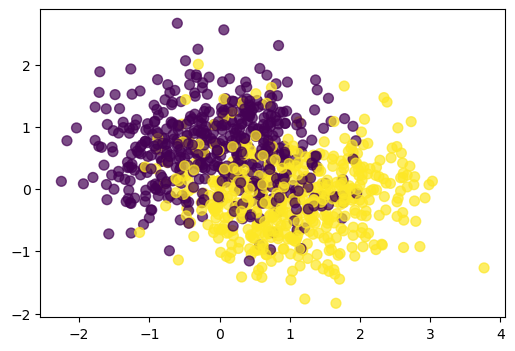

In [34]:
from sklearn import datasets
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
n_samples = 1000
data = datasets.make_moons(n_samples=n_samples, noise=.5)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

In [35]:
h=float(input("Insira o valor do hiperparâmetro h: "))

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Classificador 1: Naive Bayes ---

# Cria uma instância do classificador Gaussian Naive Bayes
gnb = GaussianNB()
# Treina o modelo usando os dados de treinamento (.fit)
gnb.fit(x_train,y_train)
# Usa o modelo treinado para fazer predições nos dados de teste (.predict)
y_pred = gnb.predict(x_test)
# Calcula a acurácia comparando as predições com os valores reais
accNB = accuracy_score(y_test, y_pred)


# --- Classificador 2: Bayesiano Paramétrico ---

# Pega os nomes das classes únicas
classes = np.unique(y)
# Cria um DataFrame para armazenar as probabilidades a posteriori para cada amostra de teste
P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes)
# Cria um vetor para armazenar a probabilidade a priori de cada classe
Pc = np.zeros(len(classes))

# Itera sobre cada uma das classes para aprender seus parâmetros
for i in range(0, len(classes)):

    # Encontra os índices (posições) das amostras de treino que pertencem à classe atual
    elementos = np.where(y_train == classes[i])[0]
    
    # Calcula a Probabilidade a Priori P(C): a frequência da classe no treino
    Pc[i] = len(elementos)/len(y_train)
    
    # Seleciona os dados de treino da classe atual
    Z = x_train[elementos,:].astype(float)
    
    # Estima os parâmetros da distribuição Gaussiana para esta classe:
    # m = vetor de médias (o "centro" da distribuição)
    m = np.mean(Z, axis = 0)
    # cv = matriz de covariância (a "forma" e "dispersão" da distribuição)
    cv = np.cov(np.transpose(Z))
    
    # Itera sobre cada amostra do conjunto de teste
    for j in range(0, x_test.shape[0]):

        # Pega a amostra de teste atual
        aux = x_test[j,:]
        aux = aux.reshape((1,len(aux)))
        
        # Calcula a Verossimilhança P(X|C)
        # Ou seja, a probabilidade de ver a amostra 'aux' dado que ela pertence à distribuição desta classe
        pj = multivariate_normal.pdf(aux, mean=m, cov=cv, allow_singular=True)
        
        # Aplica o Teorema de Bayes: P(C|X) ∝ P(X|C) * P(C)
        # Armazena a probabilidade a posteriori (não normalizada)
        P.loc[j, classes[i]] = pj*Pc[i]

# Faz a predição final
y_pred = []
# Itera sobre a matriz de probabilidades P
for k in range (0, P.shape[0]):

    # Para cada amostra, encontra o índice da classe com a MAIOR probabilidade a posteriori (Regra MAP)
    c = np.argmax(np.array(P.iloc[[k]]))
    # Adiciona o nome da classe predita à lista
    y_pred.append(classes[c])

y_pred = np.array(y_pred)

# Calcula a acurácia final para o modelo paramétrico manual
accBP = accuracy_score(y_pred, y_test)


# --- Classificador 3: Bayesiano Não-Paramétrico ---

# Lista para armazenar as acurácias de cada teste com 'h' diferente
list_of_accs = []
# Pega as classes únicas do conjunto de treino
classes = np.unique(y_train)


for i in classes:

    # Encontra as amostras da classe atual
    elements = (y_train == i)
    # Calcula a Probabilidade a Priori
    prior = np.sum(elements) / len(y_train)
    # Seleciona os dados de treino da classe atual
    Z = x_train[elements, :]
        
    # Se a classe tem amostras no conjunto de treino
    if Z.shape[0] > 0:

        # Treina o modelo de Kernel Density Estimation (KDE) com os dados da classe e o 'h' atual
        kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
            
        # Calcula a Verossimilhança P(X|C) para todas as amostras de teste
        # kde.score_samples retorna o log da probabilidade, por isso usamos np.exp()
        likelihood = np.exp(kde.score_samples(x_test))
        
        # Aplica Bayes: Posteriori ∝ Likelihood * Priori
        P[i] = likelihood * prior
    else:
        P[i] = 0
            
# Faz a predição escolhendo a classe com a maior probabilidade para cada amostra de teste
y_pred_kde = P.idxmax(axis=1).to_numpy()
# Calcula a acurácia para o 'h' testado
score = accuracy_score(y_test, y_pred_kde)
# Adiciona a acurácia na lista
list_of_accs.append(score)
        
# A acurácia final do modelo não-paramétrico é a maior acurácia encontrada entre todos os 'h' testados
accBNP = max(list_of_accs)

accNB, accBP, accBNP

(0.81, 0.81, 0.8133333333333334)

In [37]:
accs = {"Naive Bayes":accNB,"Bayesino paramétrico":accBP,"Bayesino não-paramétrico":accBNP}
best_classifier = max(accs, key=accs.get)

In [ ]:
print(f"Resposta da questão 3: O melhor método foi {best_classifier} (O classificador Bayesino não-paramétrico utilizou h={h})")

Resposta da questão 3: O melhor método foi Bayesino não-paramétrico (O classificador Bayesino não-paramétrico utilizou h=0.5)


: 